CSCE 5215 Homework assignment 3
name: Thai Ha Dang - 11741833

# Q1. 
Perform regression using SVM regression model on insurance dataset. Predict the insurance charges from the columns age, sex, bmi, children, smoker, and region. Follow the steps below:

# 1.1
Check for null values in the dataset. If present, remove those values. Convert the categorical values
into numerical values using label encoder. Normalize the numerical features using standard scaler.
Split the data into 70-30 training testing ratio. (10 Points)

In [46]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR, SVC

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# load data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
# Check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
# Convert Categorical Values to Numeric 
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [24]:
# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

In [25]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (936, 6)
Test set size: (402, 6)


# 1.2

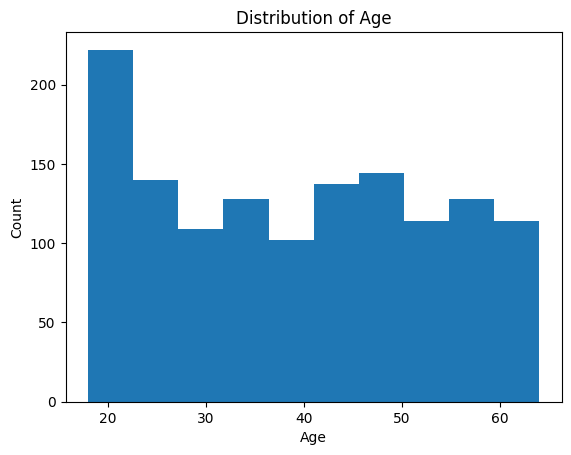

In [26]:
# Histograms (Age, BMI, Charges)
# Histogram for Age
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


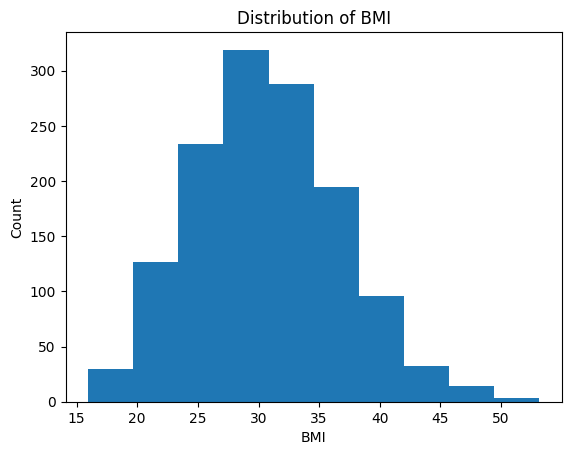

In [27]:
# Histogram for bmi
plt.hist(df['bmi'], bins=10)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

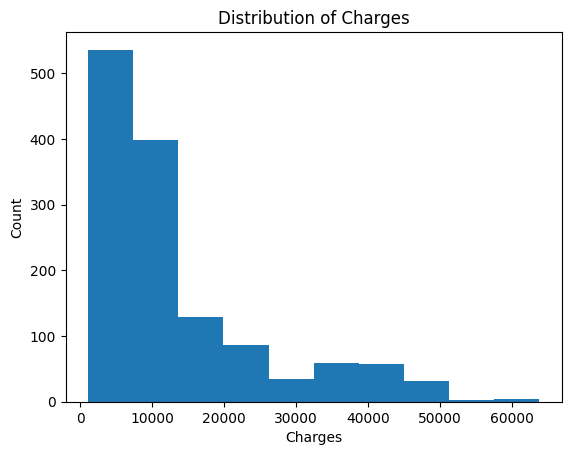

In [28]:
# Histogram for charges
plt.hist(df['charges'], bins=10)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges')
plt.show()

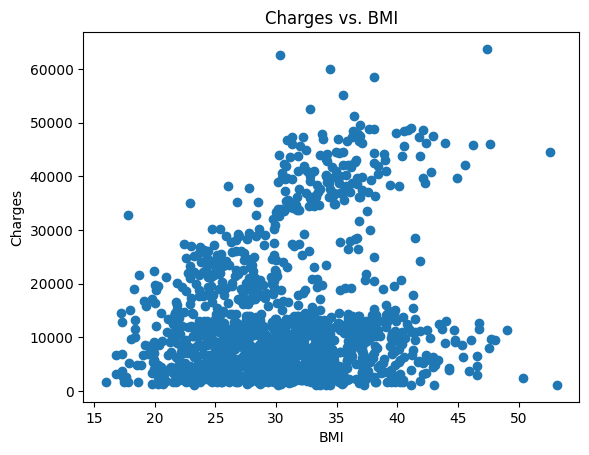

In [29]:
# scatter plot for Changes vs BMI
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges vs. BMI')
plt.show()


# 1.3
Train the model using SVM regression. Train two models one using kernel linear and one using
poly. Use bootstrapped training samples. (15 Points)

In [30]:
# Step 3: Train SVM Regression Models
# Linear kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

SVR(kernel='linear')

In [31]:
# Polynomial kernel
svr_poly = SVR(kernel='poly', degree=3)
svr_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [32]:
# Bootstrap function
def bootstrap_prediction(model, X_train, y_train, X_test, n_iterations=100):
    predictions = []
    for _ in range(n_iterations):
        # Create bootstrap sample
        indices = np.random.choice(len(X_train), len(X_train), replace=True)
        X_boot = X_train[indices]
        y_boot = y_train.iloc[indices] if isinstance(y_train, pd.Series) else y_train[indices]
        
        model.fit(X_boot, y_boot)
        pred = model.predict(X_test)
        predictions.append(pred)
    return np.array(predictions)

In [33]:
# Get bootstrap predictions
boot_pred_linear = bootstrap_prediction(svr_linear, X_train, y_train, X_test)
boot_pred_poly = bootstrap_prediction(svr_poly, X_train, y_train, X_test)

In [34]:
# Step 4: Evaluation
# Linear kernel evaluation
y_pred_linear = svr_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Poly kernel evaluation
y_pred_poly = svr_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Bootstrap confidence intervals
ci_linear = np.percentile(boot_pred_linear, [2.5, 97.5], axis=0)
ci_poly = np.percentile(boot_pred_poly, [2.5, 97.5], axis=0)

print("\nLinear Kernel Results:")
print(f"MSE: {mse_linear:.2f}")
print(f"R2 Score: {r2_linear:.2f}")

print("\nPolynomial Kernel Results:")
print(f"MSE: {mse_poly:.2f}")
print(f"R2 Score: {r2_poly:.2f}")


Linear Kernel Results:
MSE: 145531003.81
R2 Score: 0.01

Polynomial Kernel Results:
MSE: 153702055.78
R2 Score: -0.05


# Q2.

# 2.1
Check for null values in the dataset. If present, remove those values. Convert the categorical values into numerical values using label encoder. Normalize the numerical features using standard scaler. Split the data into 80-20 training testing ratio.

In [35]:
# Features and target for classification
X_class = df.drop('sex', axis=1)
y_class = df['sex']

# Normalize features
X_class_scaled = scaler.fit_transform(X_class)

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)

# 2.2
Visualize the data using bar plot to analyze smoker vs sex. Plot a correlation heatmap to understand
feature relationships. (10 Points)

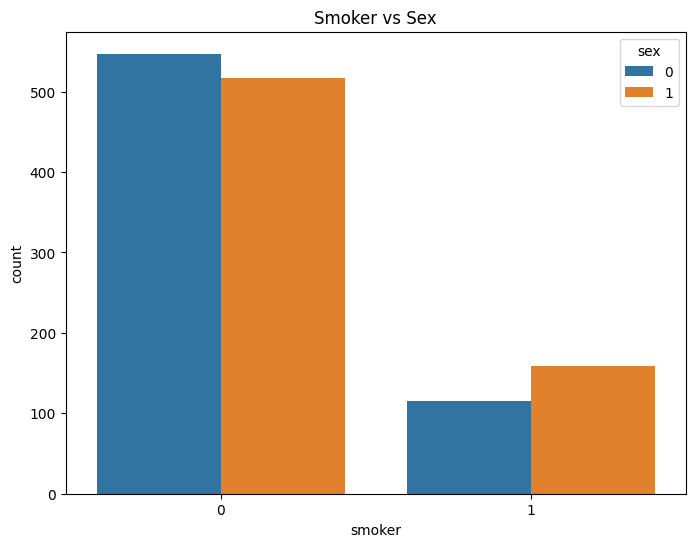

In [37]:
# Step 2: Visualization
# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', hue='sex', data=df)
plt.title('Smoker vs Sex')
plt.show()

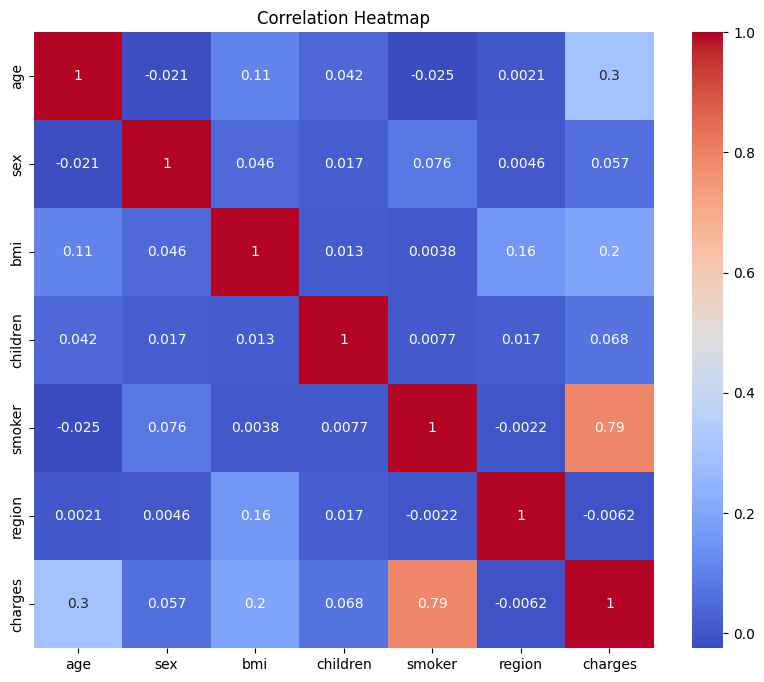

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2.3
Train the model using SVM classifier. Use rbf kernel. Train the model using K-fold cross validation
and LOOCV. (20 Points)

In [44]:
# Step 3: Train SVM Classifier
svc = SVC(kernel='rbf')

# K-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_scores = []

for train_idx, val_idx in kfold.split(X_class_scaled):
    X_train_k = X_class_scaled[train_idx]
    y_train_k = y_class.iloc[train_idx]
    X_val_k = X_class_scaled[val_idx]
    y_val_k = y_class.iloc[val_idx]
    
    svc.fit(X_train_k, y_train_k)
    score = svc.score(X_val_k, y_val_k)
    kfold_scores.append(score)

# LOOCV
loo = LeaveOneOut()
loo_scores = []

for train_idx, val_idx in loo.split(X_class_scaled):
    X_train_l = X_class_scaled[train_idx]
    y_train_l = y_class.iloc[train_idx]
    X_val_l = X_class_scaled[val_idx]
    y_val_l = y_class.iloc[val_idx]
    
    svc.fit(X_train_l, y_train_l)
    score = svc.score(X_val_l, y_val_l)
    loo_scores.append(score)

# Train final model
svc.fit(X_train_c, y_train_c)
y_pred_c = svc.predict(X_test_c)

# 2.4
Evaluate the model using accuracy score, precision, f1 score, recall. Compare performance between K-fold cv and LOOCV.

In [47]:
# Step 4: Evaluation
accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)

print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nCross-validation Results:")
print(f"K-fold CV Mean Accuracy: {np.mean(kfold_scores):.2f} (+/- {np.std(kfold_scores):.2f})")
print(f"LOOCV Mean Accuracy: {np.mean(loo_scores):.2f} (+/- {np.std(loo_scores):.2f})")


Test Set Results:
Accuracy: 0.52
Precision: 0.50
Recall: 0.48
F1 Score: 0.49

Cross-validation Results:
K-fold CV Mean Accuracy: 0.52 (+/- 0.04)
LOOCV Mean Accuracy: 0.52 (+/- 0.50)
